#Analisando os dados de Venda de uma loja de Chocolates

In [3]:
#imports
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

choco = pd.read_csv('chocolura.csv')

In [ ]:
#Criando os comparativos e jogando numa função de comparação
choco['aumento'] = choco['vendas'].diff()
choco['aceleracao'] = choco['aumento'].diff()

def plot_comparar(x,y1,y2,y3,dataset, titulo):

  #Gráfico 1
  plt.figure(figsize=(12,6))
  grafico = plt.subplot(3,1,1)
  grafico.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  #Gráfico 2
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)

  #Gráfico 3
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)

plot_comparar('mes','vendas', 'aceleracao', 'aumento', choco, 'Análise de Vendas da Chocolateria 2017/18')

In [ ]:
#Vsualizando as vendas diárias
vendasPdia = pd.read_csv('vendas_por_dia.csv')

vendasPdia['aumento'] = vendasPdia['vendas'].diff()
vendasPdia['aceleracao'] = vendasPdia['aumento'].diff()

plot_comparar('dia', 'vendas', 'aumento', 'aceleracao', vendasPdia, 'Análise das vendas diárias')

In [ ]:
#Investigando as Sazonalidades
#vendasPdia['dia'] = pd.to_datetime(vendasPdia['dia'])

vendasPdia['diaDaSemana'] = vendasPdia['dia'].dt.day_name()


#Agrupando os dias(Média das vendas em cada dia da Semana)
vendasSemanais = vendasPdia.groupby('diaDaSemana')['vendas','aumento','aceleracao'].mean().round(2)
vendasSemanais

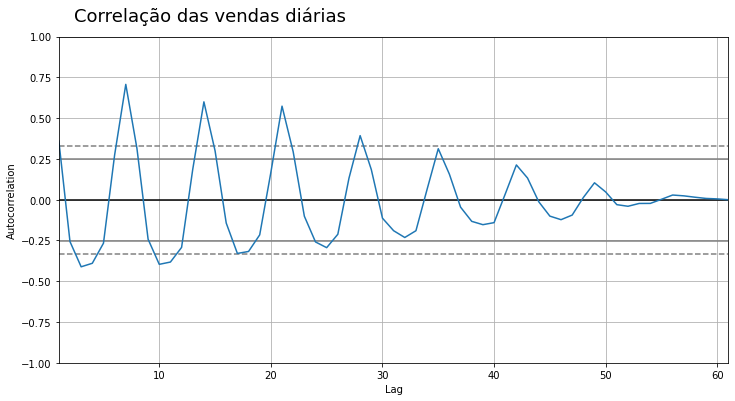

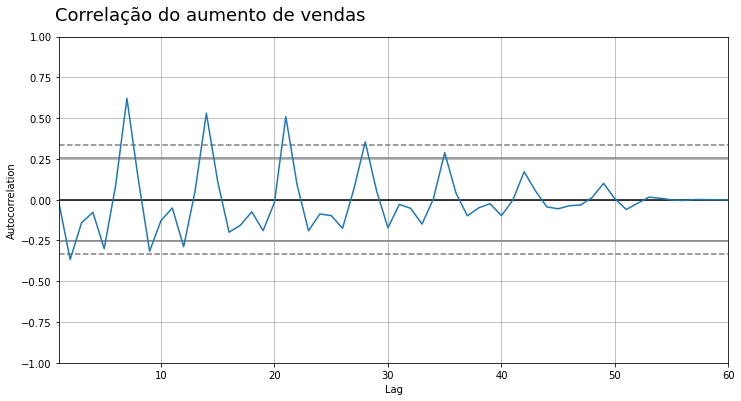

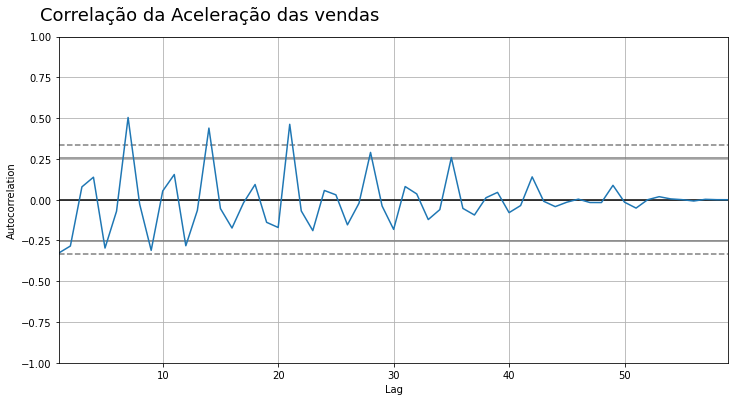

In [14]:
#Correlação das vendas Diárias
from pandas.plotting import autocorrelation_plot


#Correlação das vendas
grafico = plt.figure(figsize=(12,6))
grafico.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendasPdia['vendas'])
grafico=grafico

#Correlação do aumento de vendas em determinados períodos
grafico2 = plt.figure(figsize=(12,6))
grafico2.suptitle('Correlação do aumento de vendas', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendasPdia['aumento'][1:])
grafico2 = grafico2

#Correlação da aceleração de vendas em determinados períodos
grafico3 = plt.figure(figsize=(12,6))
grafico3.suptitle('Correlação da Aceleração das vendas', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendasPdia['aceleracao'][2:])
grafico3=grafico3